In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
#python libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#loadding the data
train_data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [7]:
train_data.head()
train_data.shape


(42000, 785)

In [8]:
test_data.shape

(28000, 784)

# Prediction using Linear Regression

In [6]:
LR_train=train_data.copy()
LR_test=test_data.copy()

In [9]:
LR_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
LR_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#using analysis on train data
train_y=LR_train['label']
train_y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [13]:
LR_train.drop(['label'],axis=1,inplace=True)
LR_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(LR_train , train_y , test_size=0.3,random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)

(29400, 784)
(12600, 784)


In [17]:
print(y_train.shape)
print(y_test.shape)

(29400,)
(12600,)


# Regression Presetup

In [18]:
from sklearn.linear_model import LogisticRegression

regress= LogisticRegression(max_iter=500)

In [19]:
regress

LogisticRegression(max_iter=500)

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Model Training

In [21]:
regress.fit(x_train,y_train)

LogisticRegression(max_iter=500)

Model Prediction

In [22]:
pred = regress.predict(x_test)

In [23]:
pred

array([8, 1, 9, ..., 5, 5, 0])

In [24]:
from sklearn.metrics import accuracy_score
regress_acc = accuracy_score(pred,y_test)*100
print(regress_acc)

90.42063492063492


# Analysis using CNN

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten , MaxPooling2D

In [27]:
CNN_train = train_data.copy()
CNN_test = test_data.copy()

In [28]:
print(CNN_train.shape)
print(CNN_test.shape)

(42000, 785)
(28000, 784)


In [30]:
CNN_train_y=CNN_train['label'].values
CNN_train_x=CNN_train.drop(['label'],1).values

In [32]:
CNN_test=CNN_test.values

In [33]:
CNN_train_x[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
CNN_train_y[:5]

array([1, 0, 1, 4, 0])

In [35]:
CNN_test[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
CNN_train_x = CNN_train_x.reshape(-1,28,28,1)
CNN_test = CNN_test.reshape(-1,28,28,1)

In [38]:
CNN_train_x[:5]

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# Split the data

In [39]:
#one hot encoding to change label values to categorical.
from keras.utils.np_utils import to_categorical


In [41]:
y= to_categorical(CNN_train_y)
print("Label Size: ",y.shape)

Label Size:  (42000, 10)


# Model Training

In [42]:
CNN_train_split,CNN_test_split,CNN_y_train_split,CNN_y_test_split = train_test_split(CNN_train_x,y , test_size=0.2,random_state=0)

In [43]:
print("\n\nCNN Data Size \n\n")

print("CNN_train_split  size : {}\n".format(CNN_train_split.shape))
print("CNN_test_split  size : {}\n".format(CNN_test_split.shape))
print("CNN_y_train_split size  : {}\n".format(CNN_y_train_split.shape))
print("CNN_y_test_split  size : {}\n".format(CNN_y_test_split.shape))



CNN Data Size 


CNN_train_split  size : (33600, 28, 28, 1)

CNN_test_split  size : (8400, 28, 28, 1)

CNN_y_train_split size  : (33600, 10)

CNN_y_test_split  size : (8400, 10)



CNN structure:-

(1) COnv 2d Layer - input size (28,28)

(2) COnv 2d layer

(3) Max Pooling2D Layer

(4) Flatten Layer to Flatten the matrices

(5) Dense Layer with 'relu activation function

(6) Dropout to reduce linearity in the model

(7) Dense with 9 Output Layer for predictions

In [45]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [47]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
batch_size=64
epochs=5

In [49]:
result = model.fit(CNN_train_split,CNN_y_train_split,epochs=epochs,batch_size=batch_size)

Epoch 1/5
525/525 [==============================] - 84s 160ms/step - loss: 0.5557 - accuracy: 0.9418
Epoch 2/5
525/525 [==============================] - 83s 159ms/step - loss: 0.0613 - accuracy: 0.9811
Epoch 3/5
525/525 [==============================] - 83s 158ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 4/5
525/525 [==============================] - 83s 158ms/step - loss: 0.0305 - accuracy: 0.9899
Epoch 5/5
525/525 [==============================] - 83s 158ms/step - loss: 0.0253 - accuracy: 0.9921


# Model Evaluation

In [50]:
acc = model.evaluate(CNN_test_split,CNN_y_test_split)

263/263 [==============================] - 5s 20ms/step - loss: 0.0988 - accuracy: 0.9794


In [51]:
acc_score = round(acc[1]*100,2)
print('CNN acc is ', acc_score )

CNN acc is  97.94


# Visualize Predicted v/s Real

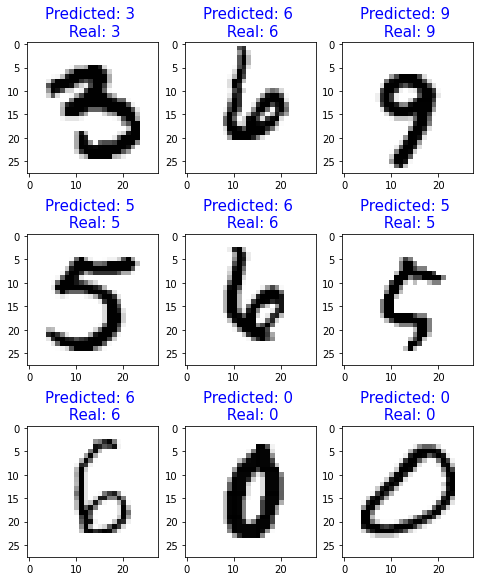

In [62]:
fig , axis = plt.subplots(3,3,figsize=(8,10))

for i,ax in enumerate(axis.flat):
    ax.imshow(CNN_test_split[i].reshape(28,28),cmap='binary')
    pred=model.predict(CNN_test_split[i].reshape(1,28,28,1)).argmax()
    real = CNN_y_test_split[i].argmax()
    ax.set_title('Predicted: {} \n Real: {}'.format(pred,real),fontsize=15,color='blue')

CNN vs Regression

In [65]:
Linear_Regression = round(regress_acc, 2)
Linear_Regression

90.42

In [68]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = Linear_Regression,
    title = {'text': "Linear Regression Accuracy"},
    domain = {'x': [0, 0.25], 'y': [0, 1]}
))
fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = acc_score,
    title = {'text': "CNN Accuracy"},
    domain={'x':[0.45,0.80],'y':[0,1]}
))

fig.show()

# Submission

In [69]:
pred = model.predict_classes(CNN_test, verbose=1)


875/875 [==============================] - 19s 21ms/step


In [70]:
subm = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
subm.head(2)

,ImageId,Label
0,1,0
1,2,0


In [71]:
subm['Label'] = pred

In [72]:
subm

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [73]:
subm.to_csv("submission.csv",index=False)